# Deep Learning (Fall 2023) - Homework 4

*Developed by Hongtau Wu & Suzanna Sia. Modified by Ping-Cheng Ku*

This notebook contains all starter code for Homework 4. Please read the written assignment carefully to ensure you include all necessary outputs in your final report. Your submission to Homework 4-notebook should include this notebook (.ipynb file), and a PDF (.pdf) of this notebook, and the hw4_utils.py file.

## Problem 1a)

### Imports

In [38]:
## External Libararies
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

### Data Loading

In [39]:
# Spectify Path to Provided Data Here
from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/fall23_hw4_prob2_data.npy'
#DATA_PATH = 'fall23_hw4_prob2_data.npy'

## Load Data and Check Dimensionality
data = np.load(DATA_PATH)
Y = data[:,2]
X = data[:,0:2]
print("Y:", Y.shape)
print("X:", X.shape)

## Polygon Boundaries
p = [[[500, 1000], [300, 800], [400, 600], [600, 600], [700, 800]],
     [[500, 600], [100, 400], [300, 200], [700, 200], [900, 400]]]
p = np.asarray(p)
p0 = p[0]
p1 = p[1]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Y: (60000,)
X: (60000, 2)


### Visualization Code

Do not touch any of the visualization code below.

In [40]:
## Helper code for visualisation (No Need to Touch)
def visualize_polygons(p0, p1):

    fig, ax = plt.subplots()
    patches = []
    polygon1 = Polygon(p0, True)
    polygon2 = Polygon(p1, True)
    patches.append(polygon1)
    patches.append(polygon2)
    p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4)
    ax.add_collection(p)
    ax.autoscale_view()
    plt.show()

def visualize_datapoints(X, Y):

    assert(X.shape[0] == Y.shape[0])
    fig, ax = plt.subplots()
    npts = 60000
    col = np.where(Y[:npts]==1,'m','b')
    x1 = X[:npts][:,0]
    x2 = X[:npts][:,1]
    ax.scatter(x1, x2, s=0.5, c=col, zorder=1)
    plt.show()

<ipython-input-40-b539349a2d90>:6: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  polygon1 = Polygon(p0, True)
<ipython-input-40-b539349a2d90>:7: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  polygon2 = Polygon(p1, True)


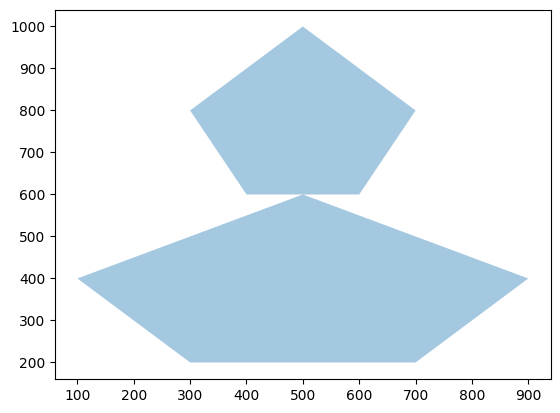

In [41]:
visualize_polygons(p0,p1)


Please fill in all code blocks marked with a #TODO.

In [42]:
def threshold_activation1(x):
    """
    TODO: Implement one activation function (unit step function)

    Args:
      x (np.ndarray): input array

    Returns (np.ndarray): output array (with the same shape as input array)

    """
    # TODO:
    out = np.where(x<0, 0, 1)
    return out

def and_gate(x):
    """
    TODO: Implement an "AND" gate

    Args:
      x (np.ndarray): array with shape (n, 1), representing n neurons as inputs.

    Returns: (int): scalar of 1 or 0
    """
    # TODO:
    n = len(x)
    out = 0
    if sum(x) > n or sum(x) == n:
      out = 1

    return out

def or_gate(x):
    """
    TODO: Implement an "OR" gate

    Args:
      x (np.ndarray): array with shape (n, 1)

    Returns: (int): scalar of 1 or 0
    """
    # TODO:
    out = 0
    if sum(x) > 0:
      out = 1

    return out

def analytical_parameters(p0, p1):
    """

    """
    ## Dimensionality
    x_dim = 2
    class_num = 2
    hidden_unit_num = 10
    # First Layer Parameter
    W = np.zeros((hidden_unit_num, x_dim))
    b = np.zeros((hidden_unit_num, 1))
    for i in range(5):
        # First polygon
        x1 = p0[i, 0]
        y1 = p0[i, 1]
        x2 = p0[(i+1)%5, 0]
        y2 = p0[(i+1)%5, 1]
        W[i, :] = [y1 - y2, x2 - x1]
        b[i, :] = x1 * y2 - x2 * y1
        # Second polygon
        x1 = p1[i, 0]
        y1 = p1[i, 1]
        x2 = p1[(i+1)%5, 0]
        y2 = p1[(i+1)%5, 1]
        W[i + 5, :] = [y1 - y2, x2 - x1]
        b[i + 5, :] = x1 * y2 - x2 * y1
    return W,b

def predict_output_v1(X, W, b):

    predictions = []
    for idx in range(data.shape[0]):
        x = np.reshape(X[idx, :], (2, 1))     # x.shape (2,1)
        # First layer
        # W.shape (10, 2), b.shape (10, 1)
        first_layer_output = np.matmul(W, x) + b # first_layer_output.shape (10, 1)
        first_layer_output = threshold_activation1(first_layer_output) #first_layer_output.shape (10, 1)
        # Second layer
        first_polygon = first_layer_output[0:5, :]
        second_polygon = first_layer_output[5:10, :]
        first_gate_output = and_gate(first_polygon)
        second_gate_output = and_gate(second_polygon)
        # Output layer
        input_to_final_gate = [first_gate_output, second_gate_output]
        prediction = or_gate(input_to_final_gate)
        predictions.append(prediction)
    return predictions

def predict_output_v2(X, W, b):
    """
    #TODO: Update usage of the gates in this function
    """
    ## Cache of Predictions
    predictions = []
    ## Cycle Trhough Data Points
    for idx in range(data.shape[0]):
        x = np.reshape(X[idx, :], (2, 1))
        # First layer
        first_layer_output = np.matmul(W, x) + b
        first_layer_output = threshold_activation1(first_layer_output)
        # Second layer
        first_polygon = first_layer_output[0:5, :]
        second_polygon = first_layer_output[5:10, :]
        first_gate_output = and_gate(first_polygon)
        second_gate_output = or_gate(second_polygon)
        # Output layer
        input_to_final_gate = [first_gate_output, second_gate_output]
        prediction = and_gate(input_to_final_gate)
        predictions.append(prediction)
    return predictions

def calc_accuracy(true_y, pred_y):
    """

    """
    true_prediction_num = 0
    for i, py in enumerate(pred_y):
        if py == true_y[i]:
            true_prediction_num += 1
    accuracy = true_prediction_num / len(pred_y)
    print("Accuracy: ", accuracy)
    return accuracy

*Sanity check:* If you correctly implemented the 'and gate' and 'or gate', all points should be classified correctly when you make predictions using `predict_output_v1()`. You should provide the datapoint visualization plot and the accuracy in your report submission.



Accuracy:  1.0


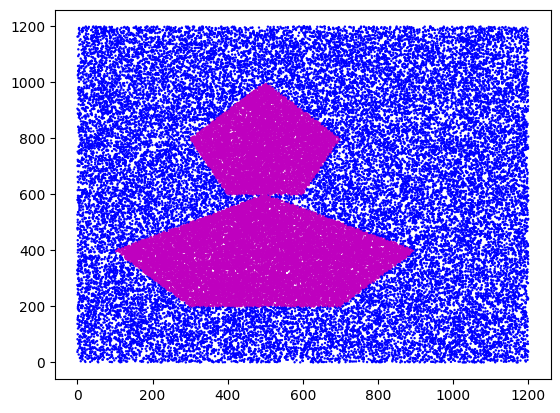

In [43]:
## Load Our Parameters
W, b = analytical_parameters(p0, p1)

## Make Predictions
pred_Y = predict_output_v1(X, W, b)

## Compute Accuracy
acc = calc_accuracy(Y, pred_Y)
assert (acc == 1)

## Visualize Predictions
visualize_datapoints(X, np.array(pred_Y))

In the code above, change the gates in `predict_output_v2()` such that only the points in the top polygon are classified correctly. Visualize your result, report the accuracy of this model, and attach it to the report submission.

To further clarify, you should **only** change the usage of the gating functions, not the code inside the gating function itself.

Accuracy:  0.66895


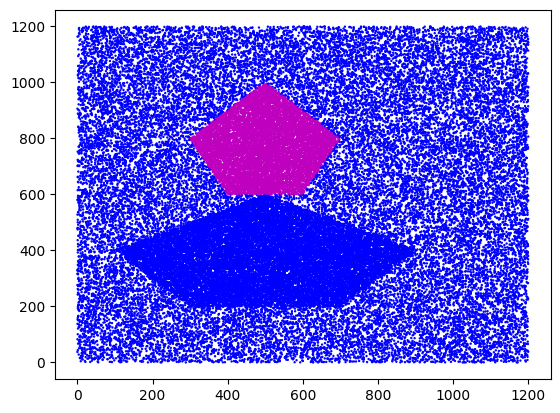

In [44]:
## Load Our Parameters
W, b = analytical_parameters(p0, p1)

## Make Predictions
pred_Y = predict_output_v2(X, W, b)

## Compute Accuracy
acc = calc_accuracy(Y, pred_Y)

## Visualize Predictions
visualize_datapoints(X, np.array(pred_Y))

## Problem 1b-d

Complete problems 1b through 1d in the space below. Please use markdown to clearly distinguish your answers for each part. Include appropriate visualizations generated here in your final report.


In [45]:
import torch
import torch.nn as nn
import random

In [46]:
## HyperParameters (Do not adjust for Question 1b)##

n_epoch = 500
n_seed = 5
lr = 1
batch_size = 5000

test_split = 1/6

layer_1_node = 10
layer_2_node = 2

#######################
layer_dims = [layer_1_node, layer_2_node]
seed_values = [random.randint(0, 10000) for _ in range(5)]

Complete the implementation of the MLP class and preprocess_data function below. Refer to the pytorch API to understand how a proper model (module) should be set up and initialized.

## Question 1b MLP and data-preprocess classes

In [47]:
class MLP(nn.Module):
    """
    MLP class to create a multi-layer perceptron dynamically.

    Args:
        input_dim (int): The dimensionality of the input features.
        layers_dims (list of int): A list specifying the number of units in each hidden layer.
        output_dim (int): The dimensionality of the output.
        seed_value (int, optional): Random seed for reproducibility. If this is set to None, no manual seed is set.

    Attributes:
        layers (nn.ModuleList): A ModuleList to hold all the layers including input, hidden and output layers.
    """

    def __init__(self, input_dim, layers_dims, output_dim, seed_value=None):
        """
        Initialize MLP.
        """
        super(MLP, self).__init__()

        ## TODO:

        self.layers = nn.ModuleList()
        # Adding input&hidden layer, each layer with an activation layer by sigmoid
        if len(layers_dims) == 0:
          self.layers.append(nn.Linear(input_dim, output_dim))
        else:
          # Adding input layer
          self.layers.append(nn.Linear(input_dim, layers_dims[0]))
          if len(layers_dims) != 1:
            for i in range(1, len(layers_dims)):
              assert(layers_dims[i] > 0)
              self.layers.append(nn.Linear(layers_dims[i-1], layers_dims[i]))

          # Adding output layer
          self.layers.append(nn.Linear(layers_dims[-1], output_dim))


        self._initialize_weights(seed_value)



    def _initialize_weights(self, seed_value):
        """
        Initialize the weights and biases of the model.
        """

        ## TODO:
        if seed_value != None:
          for layers in self.layers:
            if isinstance(layers, nn.Linear):
                torch.manual_seed(seed_value)
                torch.nn.init.xavier_uniform_(layers.weight)
                torch.manual_seed(seed_value)
                torch.nn.init.normal_(layers.bias)
        else:
          for layers in self.layers:
            if isinstance(layers, nn.Linear):
              torch.nn.init.xavier_uniform_(layers.weight)
              torch.nn.init.normal_(layers.bias)


    def forward(self, x):
        """
        Forward pass through the network.

        Args:
            x (torch.Tensor): input tensor.

        Returns:
            torch.Tensor: output tensor.
        """
        # TODO:
        for f in self.layers:
          x = nn.functional.sigmoid(f(x))
        return x

In [48]:
def preprocess_data(X, Y, test_split=1/6, type="normalize", shuffle_seed = 3):
  """
  Base on your observation of the dataset, perform any necessary preprocessing steps given data X and label Y

  Args:
    X, Y (np.ndarry): input arrays
    test_split (float): proportion of data to use for test set (default is set to 1/6)

  Return:
    X_train, X_test, y_train, y_test (torch.Tensor): output tensor objects for training/testing.

  """

  # Note - If you plan to use additional functions, please define them as inner functions
  # under preprocess_data. This will allow us to export preprocess_data function and test
  # it thorough autograder properly. For instance:

  # ... def preprocess_data(X, Y, test_split):
  # ...
  # ...     def inner_func():
  # ...         print("Hello, World!")
  # ...
  # ...     inner_func()

  # Tips: For debugging purposes, it is a good practice to perform unit tests on your inner functions
  # before you place them under the preprocess_data function.

  # TODO:
  assert(X.shape[0] == Y.shape[0])
  assert(test_split > 0 and test_split < 1)
  train_size = X.shape[0] * (1-test_split)


  #shuffle data
  np.random.seed(shuffle_seed)
  ind = np.random.permutation(X.shape[0])
  X_shuff = X[ind]
  Y_shuff = Y[ind]


  def typedPreprocessing(X, type):
    if type == "none":
        return X
    train_means = []
    test_means = []
    for cols in range(X.shape[1]):
      train_means.append(np.mean(X[0:int(train_size), cols]))
      test_means.append(np.mean(X[int(train_size):, cols]))
    if type == "zero_center":
      train_out = []
      test_out = []
      for cols in range(X.shape[1]):
        train_out.append([(x - train_means[cols]) for x in X[0:int(train_size), cols]])
        test_out.append([(x - test_means[cols]) for x in X[int(train_size):, cols]])
      train_out = np.transpose(train_out)
      test_out = np.transpose(test_out)
    elif type == "normalize":
      train_stds = []
      train_out = []
      test_stds = []
      test_out = []
      for cols in range(X.shape[1]):
        train_stds.append(np.std(X[:int(train_size), cols]))
        test_stds.append(np.std(X[int(train_size):, cols]))
        train_out.append([(x - train_means[cols])/train_stds[cols] for x in X[0:int(train_size), cols]])
        test_out.append([(x - test_means[cols])/test_stds[cols] for x in X[int(train_size):, cols]])
      train_out = np.transpose(train_out)
      test_out = np.transpose(test_out)
    return train_out, test_out


  def separateY(Y, test_size):
    y_train = Y[:int(train_size)]
    y_test = Y[int(train_size):]
    return y_train, y_test

  X_train, X_test = typedPreprocessing(X_shuff, "normalize")
  y_train, y_test = separateY(Y_shuff, train_size)

  return torch.from_numpy(X_train), torch.from_numpy(X_test), torch.from_numpy(y_train), torch.from_numpy(y_test)

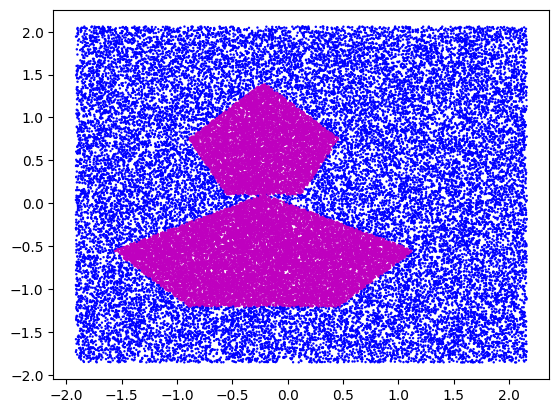

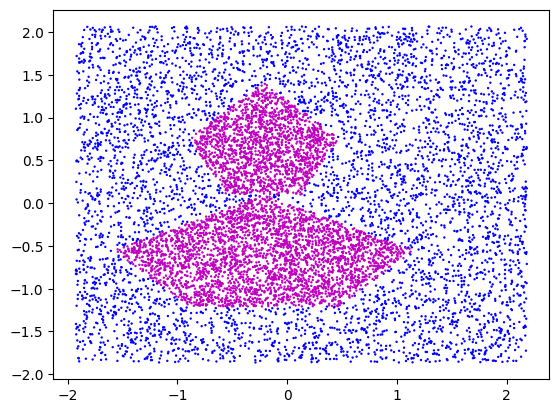

In [49]:
# Reload the data
data = np.load(DATA_PATH)

Y = data[:,2]
X = data[:,0:2]

X_train, X_test, y_train, y_test = preprocess_data(X, Y, test_split, "normalize")

visualize_datapoints(X_train, y_train)
visualize_datapoints(X_test, y_test)


Implement the train loop (for a single run)


In [28]:
def train(model,
          loss_f,
          optimizer,
          X_train,
          y_train,
          X_test=None,
          y_test=None,
          n_epoch=500,
          batch_size=None,
          seed_value=0):
    """
      The main function for model training.

      Args:
        model (torch.nn.Module): model to train
        loss_f (torch.nn.Module): loss function
        optimizer (torch.optim.Optimizer): optimizer
        X_train, y_train (torch.Tensor): training data
        X_test, y_test (torch.Tensor): test data
        n_epoch (int): number of epochs
        batch_size (int): size of the batch
        seed_value (int): random seed value

      Returns:
        .... (to be added by student)

    """

    # TODO: Complete the train function. You need to implement mini-batch training for this question.
    #
    # Tips: Perform proper sanity checks to ensure your inputs are reasonable. Keep track of important variables
    # (loss, accuracy) throughout the training loop. Print intermediate values reguarly to help you track if
    # your training is working as intended (so that if something is wrong you can terminate the process early
    # instead of going through all 5 runs.)

    # Data loader
    training_loader = torch.utils.data.DataLoader(list(zip(X_train, y_train)), batch_size)

    # Training
    training_loss = []
    testing_acc = []
    for epoch in range(n_epoch):
      loss = 0
      for X_batch, y_batch in training_loader:
        X_batch = torch.tensor(X_batch, dtype=torch.float32)
        y_pred = model(X_batch)[:, 0]
        loss = loss_f(y_pred.double(), y_batch.double())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

      training_loss.append(loss.item())
      # Testing
      model.eval()
      with torch.inference_mode():
        x_eval = torch.tensor(X_test, dtype=torch.float32)
        y_eval = torch.round(model(x_eval))
        y_t = torch.tensor(y_test, dtype=torch.float32)
        acc = torch.eq(y_eval.squeeze(), y_t.squeeze()).sum().item()
        testing_acc.append(acc/len(X_test))
      if epoch % 50 == 0:
        print(f'Epoch [{epoch}/{n_epoch}], train Loss: {training_loss[-1]:.4f},  test accuracy: {testing_acc[-1]:.4f}')


    return training_loss, testing_acc, model

Now we start the training. We will iterate through 5 runs. To ensure reproducibility of the performance, we will be using the seed values to initialize our MLP and in our training loop. After the training, you should "**check if you can get the same model accuracy if a seed is re-used**".

### 1b Running Results

In [ ]:
# TODO: complete the cell

## Iterate over Random Initializations
loss_list = []
acc_list = []
model_list = []


for idx in range(len(seed_values)):
    seed_value = seed_values[idx]
    print("~~ Beginning run {} with seed value {} ~~".format(idx, seed_value))
    model = MLP(2, [10,2], 1, seed_value)
    loss, acc, trained_model = train(model, nn.BCELoss(), torch.optim.SGD(model.parameters(), lr=lr), X_train, y_train,
          X_test, y_test, n_epoch, batch_size, seed_value)
    loss_list.append(loss)
    acc_list.append(acc)
    model_list.append(trained_model)


~~ Beginning run 0 with seed value 3660 ~~


<ipython-input-54-50708b47df1a>:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_batch = torch.tensor(X_batch, dtype=torch.float32)
<ipython-input-54-50708b47df1a>:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_eval = torch.tensor(X_test, dtype=torch.float32)
<ipython-input-54-50708b47df1a>:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_t = torch.tensor(y_test, dtype=torch.float32)


Epoch [0/500], train Loss: 0.6919,  test accuracy: 0.5806
Epoch [50/500], train Loss: 0.4086,  test accuracy: 0.8157
Epoch [100/500], train Loss: 0.2036,  test accuracy: 0.9360
Epoch [150/500], train Loss: 0.1383,  test accuracy: 0.9499
Epoch [200/500], train Loss: 0.1017,  test accuracy: 0.9656
Epoch [250/500], train Loss: 0.0739,  test accuracy: 0.9739
Epoch [300/500], train Loss: 0.0604,  test accuracy: 0.9777
Epoch [350/500], train Loss: 0.0533,  test accuracy: 0.9800
Epoch [400/500], train Loss: 0.0491,  test accuracy: 0.9805
Epoch [450/500], train Loss: 0.0461,  test accuracy: 0.9803
~~ Beginning run 1 with seed value 1226 ~~
Epoch [0/500], train Loss: 0.6911,  test accuracy: 0.5953
Epoch [50/500], train Loss: 0.2519,  test accuracy: 0.9224
Epoch [100/500], train Loss: 0.1585,  test accuracy: 0.9496
Epoch [150/500], train Loss: 0.1441,  test accuracy: 0.9513
Epoch [200/500], train Loss: 0.1328,  test accuracy: 0.9537
Epoch [250/500], train Loss: 0.1134,  test accuracy: 0.9592
Epo

In [ ]:
# Statistics:
final_loss = []
final_acc = []

for element in loss_list:
  final_loss.append(element[-1])
for element in acc_list:
  final_acc.append(element[-1])

def describeResults(name, arr, seeds):
  mean = np.mean(arr)
  std = np.std(arr)
  num = len(arr)

  print("The results of " + name + " and their corresponding seeds are: ")
  print(arr)
  print(seeds)
  print("There are %2d results, mean = %5.6f, std = %5.6f"% (num, mean, std))

describeResults("loss", final_loss, seed_values)
describeResults("acc", final_acc,seed_values)

The results of loss and their corresponding seeds are: 
[0.043881471884229674, 0.04845056016600893, 0.08643570911327858, 0.059574835271294195, 0.08195801781814992]
[3660, 1226, 181, 2768, 113]
There are  5 results, mean = 0.064060, std = 0.017274
The results of acc and their corresponding seeds are: 
[0.9806, 0.9831, 0.9733, 0.9751, 0.9712]
[3660, 1226, 181, 2768, 113]
There are  5 results, mean = 0.976660, std = 0.004484


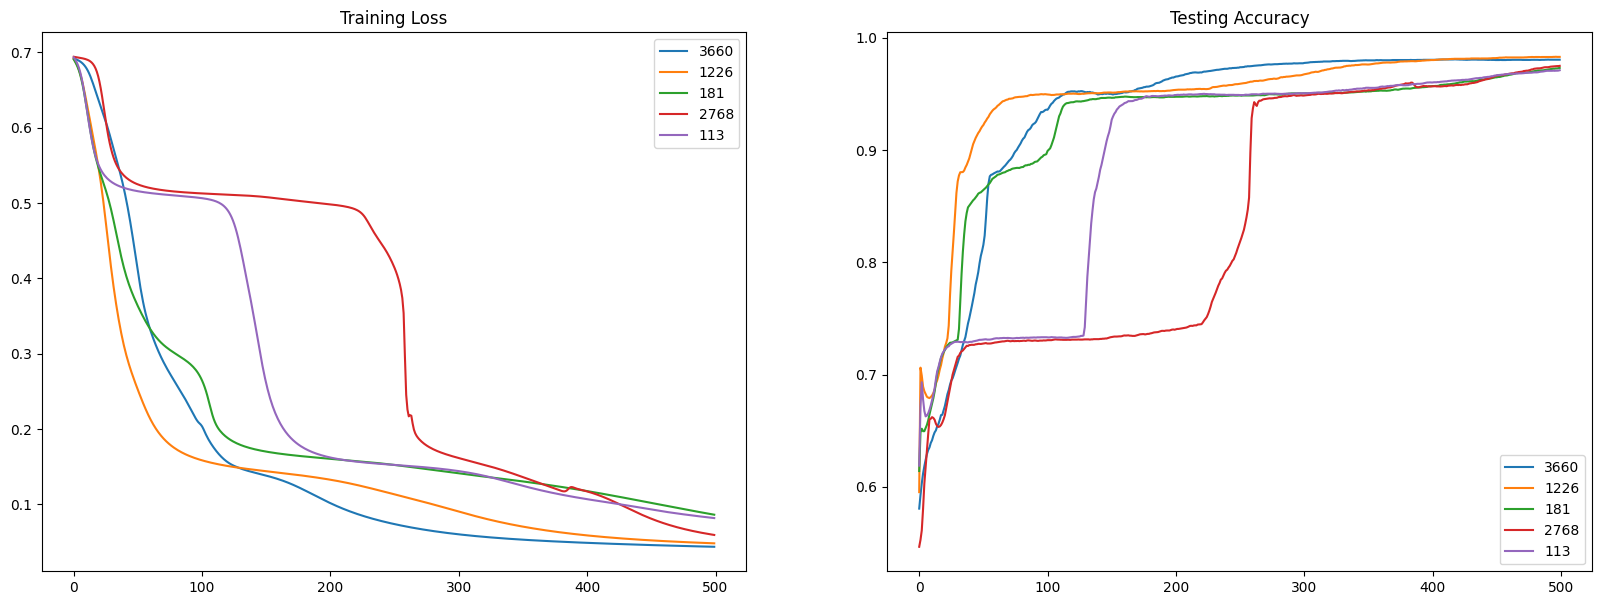

In [ ]:
# TODO: Plot Results (Please plot the loss of all 5 runs in a same figure, and
# the accuracy of the runs in another figure). Use visualize_datapoints to check
# the performance of your model.
epochs = [*range(0, 500, 1)]

fig, axs = plt.subplots(1, 2,figsize=(20, 7))
for losses in loss_list:
  axs[0].plot(epochs, losses)
axs[0].set_title('Training Loss')
axs[0].legend(seed_values)
for accs in acc_list:
  axs[1].plot(epochs, accs)
axs[1].set_title('Testing Accuracy')
axs[1].legend(seed_values)


plt.show()

<ipython-input-59-f58b1a071abc>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_in = torch.tensor(X_test[i], dtype=torch.float32)


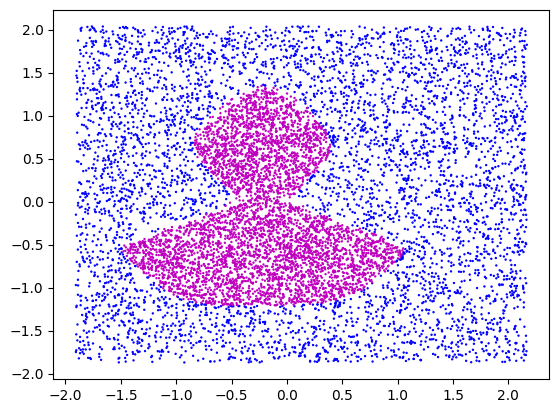

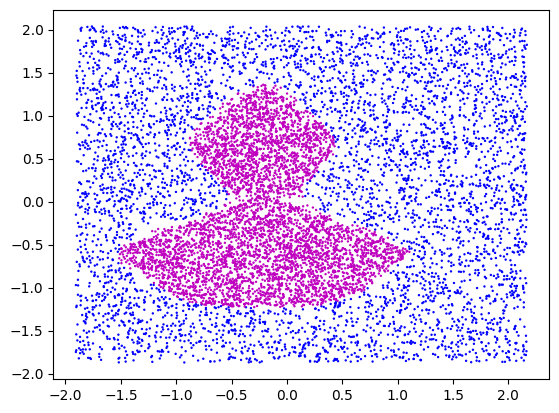

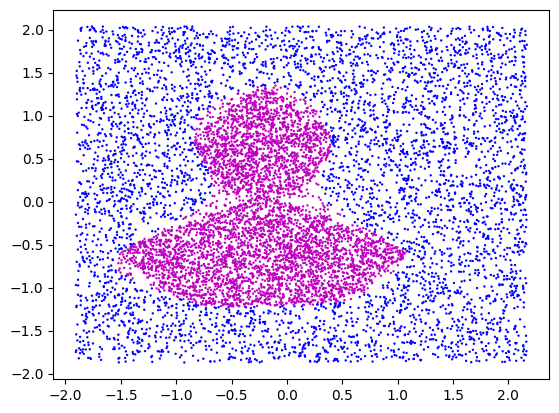

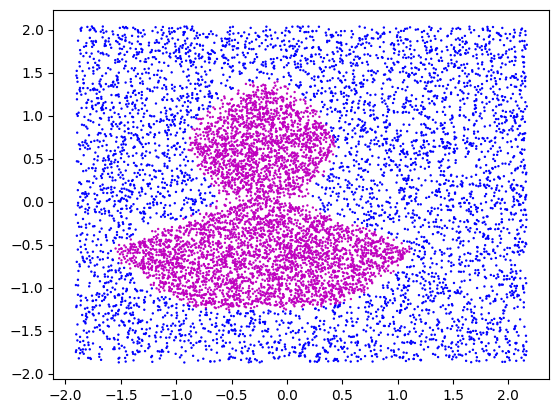

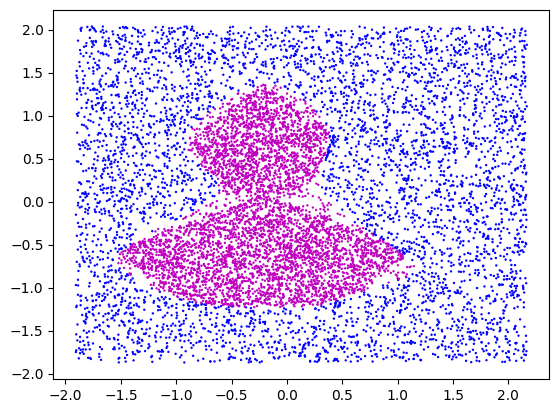

In [ ]:

for mods in model_list:
  pred_Y = []
  for i in range(len(X_test)):
    x_in = torch.tensor(X_test[i], dtype=torch.float32)
    pred_Y.append(mods(x_in).round().item())
  visualize_datapoints(X_test, np.array(pred_Y))



## Problem 1c

In [ ]:
# Problem 1c: make adjustments to the layers, and then re-run the training loop with 5 runs and visualizations

## Hyperparameters

n_epoch = 500
n_seed = 5
lr = 1
batch_size = 5000

test_split = 1/6

layer_dims = []

##########################
seed_values = [random.randint(0, 10000) for _ in range(5)]

# Wider hidden layer
loss_list = []
acc_list = []
model_list = []

for idx in range(len(seed_values)):
    seed_value = seed_values[idx]
    print("~~ Beginning run {} with seed value {} ~~".format(idx, seed_value))
    model = MLP(2, [40,20,8], 1, seed_value)
    loss, acc, trained_model = train(model, nn.BCELoss(), torch.optim.SGD(model.parameters(), lr=lr), X_train, y_train,
          X_test, y_test, n_epoch, batch_size, seed_value)
    loss_list.append(loss)
    acc_list.append(acc)
    model_list.append(trained_model)



~~ Beginning run 0 with seed value 6527 ~~


<ipython-input-54-50708b47df1a>:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_batch = torch.tensor(X_batch, dtype=torch.float32)
<ipython-input-54-50708b47df1a>:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_eval = torch.tensor(X_test, dtype=torch.float32)
<ipython-input-54-50708b47df1a>:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_t = torch.tensor(y_test, dtype=torch.float32)


Epoch [0/500], train Loss: 0.6946,  test accuracy: 0.5015
Epoch [50/500], train Loss: 0.5290,  test accuracy: 0.7262
Epoch [100/500], train Loss: 0.3149,  test accuracy: 0.8764
Epoch [150/500], train Loss: 0.2082,  test accuracy: 0.9312
Epoch [200/500], train Loss: 0.1574,  test accuracy: 0.9476
Epoch [250/500], train Loss: 0.1394,  test accuracy: 0.9476
Epoch [300/500], train Loss: 0.1221,  test accuracy: 0.9541
Epoch [350/500], train Loss: 0.1027,  test accuracy: 0.9643
Epoch [400/500], train Loss: 0.0871,  test accuracy: 0.9700
Epoch [450/500], train Loss: 0.0754,  test accuracy: 0.9733
~~ Beginning run 1 with seed value 3710 ~~
Epoch [0/500], train Loss: 0.6934,  test accuracy: 0.5453
Epoch [50/500], train Loss: 0.4941,  test accuracy: 0.7307
Epoch [100/500], train Loss: 0.3172,  test accuracy: 0.8750
Epoch [150/500], train Loss: 0.1884,  test accuracy: 0.9432
Epoch [200/500], train Loss: 0.1551,  test accuracy: 0.9500
Epoch [250/500], train Loss: 0.1454,  test accuracy: 0.9490
Epo

In [ ]:
# Statistics:
final_loss = []
final_acc = []

for element in loss_list:
  final_loss.append(element[-1])
for element in acc_list:
  final_acc.append(element[-1])

def describeResults(name, arr, seeds):
  mean = np.mean(arr)
  std = np.std(arr)
  num = len(arr)

  print("The results of " + name + " and their corresponding seeds are: ")
  print(arr)
  print(seeds)
  print("There are %2d results, mean = %5.6f, std = %5.6f"% (num, mean, std))

describeResults("loss", final_loss, seed_values)
describeResults("acc", final_acc,seed_values)

The results of loss and their corresponding seeds are: 
[0.0670551434835993, 0.06378871648513322, 0.06125706727313048, 0.07836562043093466, 0.08027216052554231]
[6527, 3710, 6111, 1112, 305]
There are  5 results, mean = 0.070148, std = 0.007734
The results of acc and their corresponding seeds are: 
[0.9757, 0.9772, 0.9776, 0.9701, 0.9721]
[6527, 3710, 6111, 1112, 305]
There are  5 results, mean = 0.974540, std = 0.002948


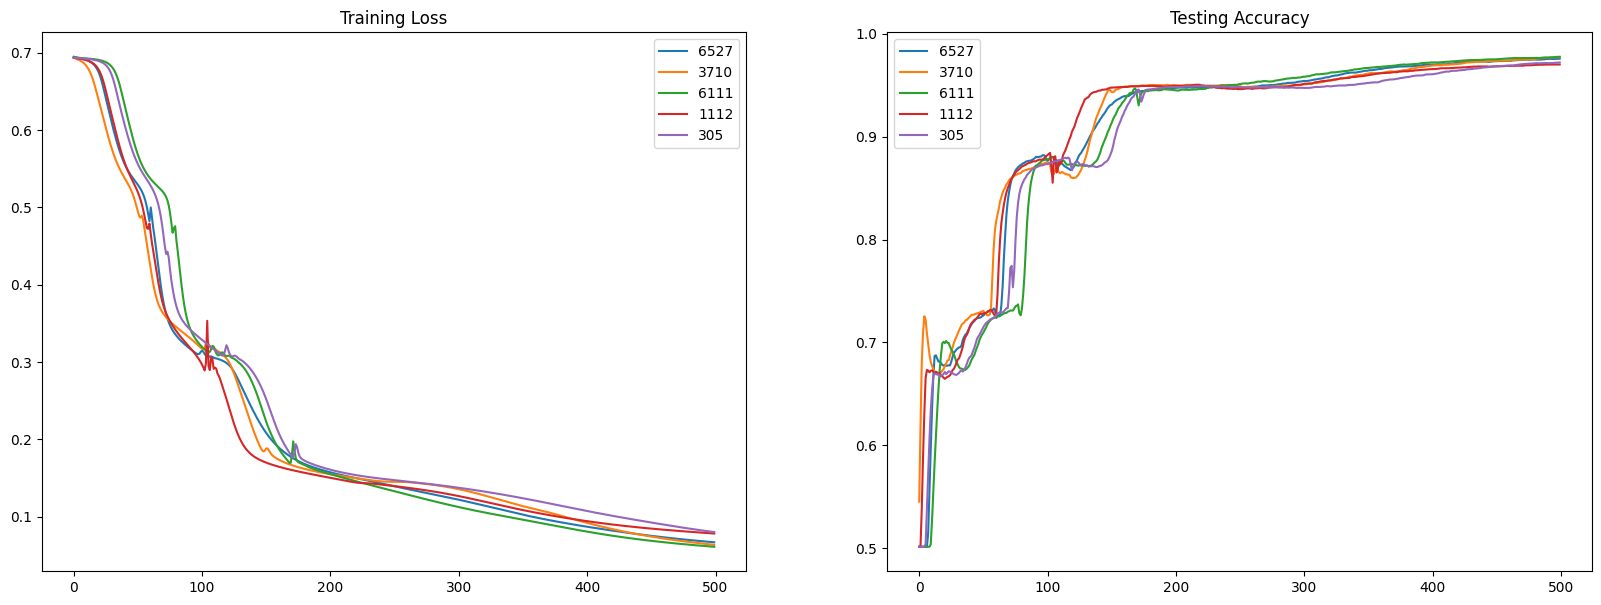

In [ ]:
# TODO: Plot Results (Please plot the loss of all 5 runs in a same figure, and
# the accuracy of the runs in another figure). Use visualize_datapoints to check
# the performance of your model.
epochs = [*range(0, 500, 1)]

fig, axs = plt.subplots(1, 2,figsize=(20, 7))
for losses in loss_list:
  axs[0].plot(epochs, losses)
axs[0].set_title('Training Loss')
axs[0].legend(seed_values)
for accs in acc_list:
  axs[1].plot(epochs, accs)
axs[1].set_title('Testing Accuracy')
axs[1].legend(seed_values)


plt.show()

<ipython-input-64-f58b1a071abc>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_in = torch.tensor(X_test[i], dtype=torch.float32)


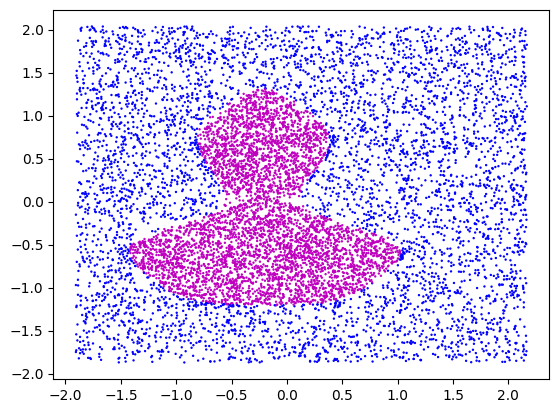

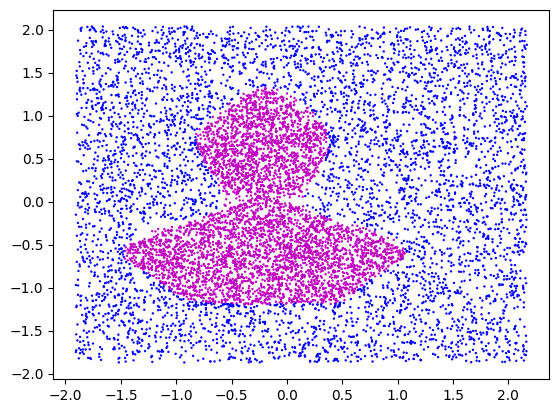

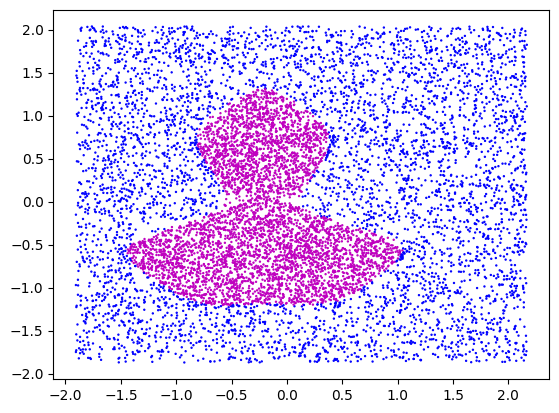

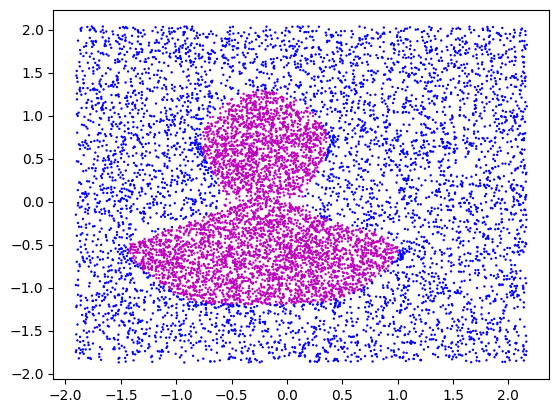

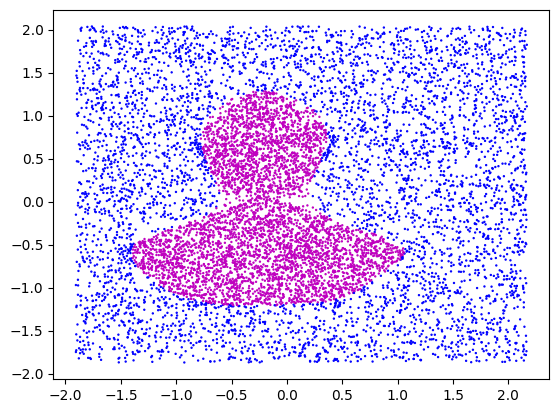

In [ ]:

for mods in model_list:
  pred_Y = []
  for i in range(len(X_test)):
    x_in = torch.tensor(X_test[i], dtype=torch.float32)
    pred_Y.append(mods(x_in).round().item())
  visualize_datapoints(X_test, np.array(pred_Y))



For Problem 1d, please write your response in the Latex report.

## Problem 2

All code for Problem 2 should go below. We provide data loaders and relevant imports to get you started. If you are working locally (instead of using Google Colab), we recommend using Conda to install pytorch (https://pytorch.org).

### Imports

In [ ]:
## Additional External Libraries (Deep Learning)
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
from torchvision import transforms as tfs
from PIL import Image
from torchvision.datasets import FashionMNIST

### Data Loading

In [ ]:
# Hyperparameter (Feel free to make modifications)
TRAIN_BATCH_SIZE = 50
VAL_BATCH_SIZE = 50
TEST_BATCH_SIZE = 1

# Transform data to PIL images
transforms = tfs.Compose([tfs.ToTensor()])

# Train/Val Subsets
train_mask = range(50000)
val_mask = range(50000, 60000)

# Download/Load Dataset
train_dataset = FashionMNIST('./data', train=True, transform=transforms, download=True)
test_dataset = FashionMNIST('./data', train=False, transform=transforms, download=True)

# Data Loaders
train_dataloader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, sampler=SubsetRandomSampler(train_mask))
val_dataloader = DataLoader(train_dataset, batch_size=VAL_BATCH_SIZE, sampler=SubsetRandomSampler(val_mask))
test_dataloader = DataLoader(test_dataset, batch_size=TEST_BATCH_SIZE)

100%|██████████| 26421880/26421880 [00:01<00:00, 20844615.15it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 332683.57it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6206065.62it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 24818709.19it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



## Problem 2a)

### Design Model

In [ ]:
class CNNet_2a(nn.Module):

    def __init__(self, seed_value):
        """

        """
        ## Inherent Torch Module
        super(CNNet_2a, self).__init__()

        # First conv layer with ReLU and MaxPool: 28*28*1 -> 28*28*32 -> 14*14*32
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Second conv layer with ReLU and MaxPool: 14*14*32 -> 12*12*64 -> 6*6*64
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )


        # Third fc layer with sigmoid activation
        self.fc1 = nn.Linear(6*6*64, 648)
        self.sig1 = nn.Sigmoid()

        # Fourth fc layer with sigmoid activation
        self.fc2 = nn.Linear(648, 128)
        self.sig2 = nn.Sigmoid()

        # Output layer
        self.output = nn.Linear(128, 10)

        self._initialize_weights(seed_value)


    def _initialize_weights(self, seed_value):
        """
        Initialize the weights and biases of the model.
        """
        torch.manual_seed(seed_value)
        torch.nn.init.xavier_uniform_(self.conv1[0].weight)
        torch.nn.init.xavier_uniform_(self.conv2[0].weight)

        torch.manual_seed(seed_value)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        torch.nn.init.normal_(self.fc1.bias)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        torch.nn.init.normal_(self.fc2.bias)
        torch.nn.init.xavier_uniform_(self.output.weight)
        torch.nn.init.normal_(self.output.bias)


    def forward(self, x):
        """
        """
        ##TODO: Setup Forward Pass
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        x = self.sig1(self.fc1(x))
        x = self.sig2(self.fc2(x))
        x = self.output(x)

        return x

### Model Training

In [ ]:
def train(model,
          loss_f,
          optimizer,
          n_epoch=50,
          train_dataloader=train_dataloader,
          val_dataloader=val_dataloader,
          test_dataloader=test_dataloader,
          seed_value=None):
  # Define lists to store training and validation losses
  train_losses = []
  val_losses = []
  train_accs = []
  val_accs = []

  best_model = model
  best_train_acc = -1
  best_val_acc = -1
  best_ind = -1

  # Training loop
  for epoch in range(n_epoch):
      model.train()
      train_loss = 0.0
      train_correct = 0

      # Iterate through the training data
      for inputs, labels in train_dataloader:
          # Forward pass
          output = model(inputs)

          # Compute loss
          loss = loss_f(output, labels)

          # Backpropagation
          optimizer.zero_grad()  # Zero the gradients
          loss.backward()
          optimizer.step()

          # Update running training loss
          train_loss += loss.item()
          predict = output.argmax(axis=1)
          train_correct += (predict == labels).float().sum()

      # Compute average training loss for the epoch
      avg_train_loss = train_loss / 50000
      train_losses.append(avg_train_loss)
      train_acc = train_correct / 50000
      train_accs.append(train_acc)

      # Validation
      model.eval()
      val_loss = 0.0
      val_correct = 0
      with torch.no_grad():
          for inputs, labels in val_dataloader:
              output = model(inputs)
              loss = loss_f(output, labels)
              val_loss += loss.item()
              predict = output.argmax(axis=1)
              val_correct += (predict == labels).float().sum()

      avg_val_loss = val_loss / 10000
      val_losses.append(avg_val_loss)
      val_acc = val_correct / 10000
      val_accs.append(val_acc)

      # Record the best model
      if val_acc > best_val_acc:
        best_model = model
        best_ind = epoch
        best_train_acc = train_acc
        best_val_acc = val_acc

      print(f'Epoch [{epoch+1}/{n_epoch}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')
      print(f'Train accuracy: {train_acc:.4f}, Val accuracy: {val_acc:.4f}')

  # Test
  model.eval()
  test_loss = 0.0
  test_correct = 0
  with torch.no_grad():
      for inputs, labels in test_dataloader:
          output = best_model(inputs)
          loss = loss_f(output, labels)
          test_loss += loss.item()
          predict = output.argmax(axis=1)
          test_correct += (predict == labels).float().sum()

  best_test_loss = test_loss / len(test_dataloader)
  best_test_acc = test_correct / len(test_dataloader)

  print(f'Best Model achieved at epoch: {best_ind+1:.4f}')
  print(f'train accuracy: {best_train_acc:.4f}, validation accuracy: {best_val_acc:.4f}, test accuracy: {best_test_acc:.4f}')


  return train_losses, val_losses, train_accs, val_accs, best_model, best_ind, best_train_acc, best_val_acc, best_test_acc

In [ ]:
## TODO: choose reasonable hyperparameters (feel free to make adjustments)
n_epoch = 50
lr = 0.5
seed_Conv_2a = random.randint(0, 10000)
model_2a = CNNet_2a(seed_Conv_2a)
optimizer = torch.optim.SGD(model_2a.parameters(), lr=lr)
loss_f = nn.CrossEntropyLoss()

In [ ]:
## Run Training Loop
# Result

train_losses_2a, val_losses_2a, train_accs_2a, val_accs_2a, best_model_2a, best_ind_2a, best_train_acc_2a, best_val_acc_2a, best_test_acc_2a = train(
    model_2a, loss_f, optimizer, n_epoch = n_epoch, seed_value = seed_Conv_2a
)

Epoch [1/50], Train Loss: 0.0161, Val Loss: 0.0098
Train accuracy: 0.6918, Val accuracy: 0.8109
Epoch [2/50], Train Loss: 0.0082, Val Loss: 0.0075
Train accuracy: 0.8479, Val accuracy: 0.8660
Epoch [3/50], Train Loss: 0.0068, Val Loss: 0.0073
Train accuracy: 0.8736, Val accuracy: 0.8625
Epoch [4/50], Train Loss: 0.0060, Val Loss: 0.0061
Train accuracy: 0.8867, Val accuracy: 0.8842
Epoch [5/50], Train Loss: 0.0055, Val Loss: 0.0062
Train accuracy: 0.8972, Val accuracy: 0.8867
Epoch [6/50], Train Loss: 0.0050, Val Loss: 0.0055
Train accuracy: 0.9056, Val accuracy: 0.8973
Epoch [7/50], Train Loss: 0.0047, Val Loss: 0.0054
Train accuracy: 0.9115, Val accuracy: 0.8982
Epoch [8/50], Train Loss: 0.0044, Val Loss: 0.0051
Train accuracy: 0.9187, Val accuracy: 0.9043
Epoch [9/50], Train Loss: 0.0040, Val Loss: 0.0054
Train accuracy: 0.9231, Val accuracy: 0.8991
Epoch [10/50], Train Loss: 0.0038, Val Loss: 0.0051
Train accuracy: 0.9280, Val accuracy: 0.9097
Epoch [11/50], Train Loss: 0.0035, Val 

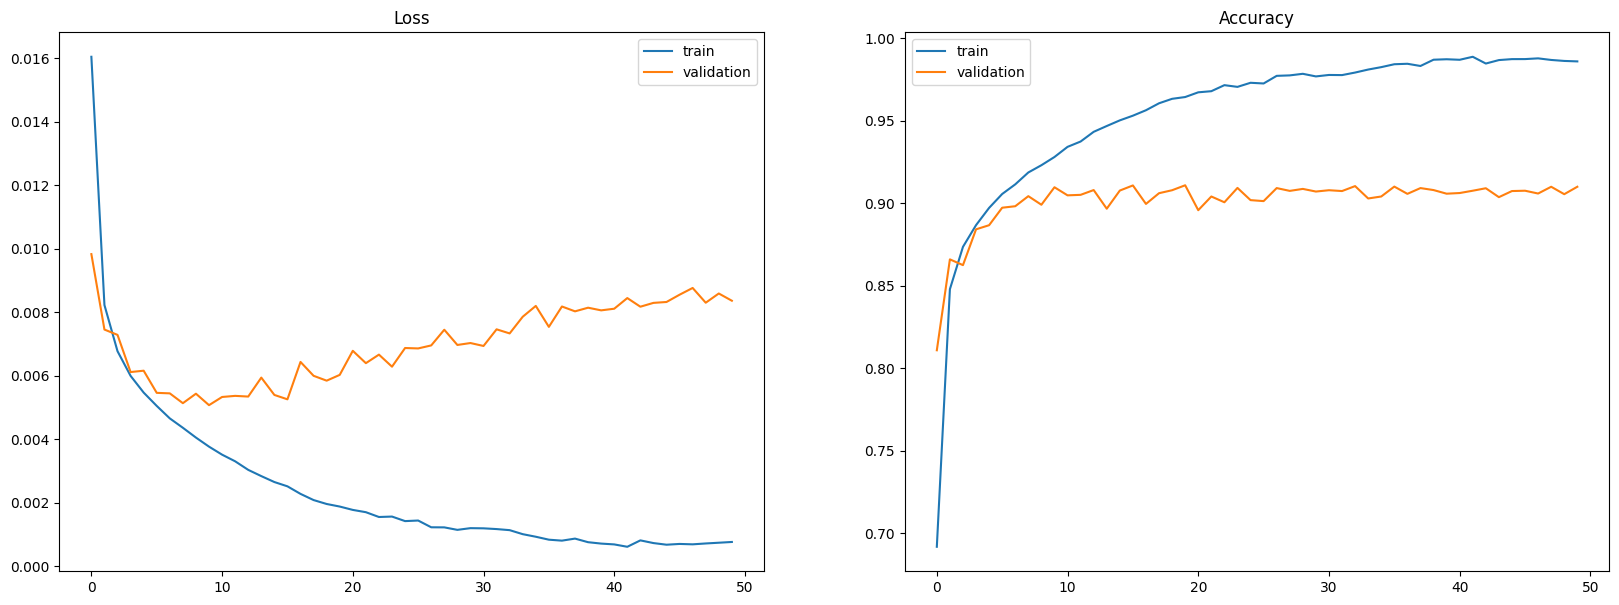

In [ ]:
epochs = [*range(0, 50, 1)]
loss_list_2a = [train_losses_2a, val_losses_2a]
acc_list_2a = [train_accs_2a, val_accs_2a]

fig, axs = plt.subplots(1, 2,figsize=(20, 7))
for losses in loss_list_2a:
  axs[0].plot(epochs, losses)
axs[0].set_title('Loss')
axs[0].legend(['train', 'validation'])
for accs in acc_list_2a:
  axs[1].plot(epochs, accs)
axs[1].set_title('Accuracy')
axs[1].legend(['train', 'validation'])


plt.show()

## Problem 2b)

Now try to improve your model using additional techniques learned during class. You should be able to use the same training function as above, but will need to create a new model architecture.

### Data Loading

You should maintain the splits from above, but feel free to alter the dataloaders (i.e. transforms) as you wish.

In [ ]:
# Hyperparameter (Feel Free to Change These, but Make Sure your Training Loop Still Works as Expected)
TRAIN_BATCH_SIZE = 50
VAL_BATCH_SIZE = 50
TEST_BATCH_SIZE = 1
s
# Transform data to PIL images
transforms = tfs.Compose([tfs.ToTensor()]) ##TODO: Use the same from above or consider alternatives

# Train/Val Subsets
train_mask = range(50000)
val_mask = range(50000, 60000)

# Download/Load Dataset
train_dataset = FashionMNIST('./data', train=True, transform=transforms, download=True)
test_dataset = FashionMNIST('./data', train=False, transform=transforms, download=True)

# Data Loaders
train_dataloader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, sampler=SubsetRandomSampler(train_mask))
val_dataloader = DataLoader(train_dataset, batch_size=VAL_BATCH_SIZE, sampler=SubsetRandomSampler(val_mask))
test_dataloader = DataLoader(test_dataset, batch_size=TEST_BATCH_SIZE)

### Model Design

In [ ]:
class CNNet_2b(nn.Module):

    def __init__(self, seed_value):
        """

        """
        ## Inherent Torch Module
        super(CNNet_2b, self).__init__()

        # First conv layer with ReLU and MaxPool: 28*28*1 -> 28*28*32 -> 14*14*32
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Second conv layer with ReLU and MaxPool: 14*14*32 -> 12*12*64 -> 6*6*64
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )


        # Third fc layer with sigmoid activation
        self.fc1 = nn.Linear(6*6*64, 648)
        self.sig1 = nn.Sigmoid()
        self.drop1 = nn.Dropout2d(0.25)

        # Fourth fc layer with sigmoid activation
        self.fc2 = nn.Linear(648, 128)
        self.sig2 = nn.Sigmoid()
        self.drop2 = nn.Dropout2d(0.25)

        # Output layer
        self.output = nn.Linear(128, 10)

        self._initialize_weights(seed_value)


    def _initialize_weights(self, seed_value):
        """
        Initialize the weights and biases of the model.
        """
        torch.manual_seed(seed_value)
        torch.nn.init.xavier_uniform_(self.conv1[0].weight)
        torch.nn.init.xavier_uniform_(self.conv2[0].weight)

        torch.manual_seed(seed_value)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        torch.nn.init.normal_(self.fc1.bias)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        torch.nn.init.normal_(self.fc2.bias)
        torch.nn.init.xavier_uniform_(self.output.weight)
        torch.nn.init.normal_(self.output.bias)


    def forward(self, x):
        """
        """
        ##TODO: Setup Forward Pass
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        x = self.drop1(self.sig1(self.fc1(x)))
        x = self.drop2(self.sig2(self.fc2(x)))
        x = self.output(x)

        return x

### Model Training

In [ ]:
##TODO: Fit and evaluate your model. What do you observe?
n_epoch = 50
#lr = 0.05
seed_Conv = random.randint(0, 10000)
model = CNNet_2b(seed_Conv)

# different optimizer
optimizer = torch.optim.Adam(model.parameters())
loss_f = nn.CrossEntropyLoss()

## Run Training Loop
# Result

train_losses, val_losses, train_accs, val_accs, best_model, best_ind, best_train_acc, best_val_acc, best_test_acc = train(
    model, loss_f, optimizer, n_epoch, seed_value = seed_Conv
)

Epoch [1/50], Train Loss: 0.0093, Val Loss: 0.0063
Train accuracy: 0.8381, Val accuracy: 0.8833
Epoch [2/50], Train Loss: 0.0061, Val Loss: 0.0054
Train accuracy: 0.8916, Val accuracy: 0.8997
Epoch [3/50], Train Loss: 0.0053, Val Loss: 0.0050
Train accuracy: 0.9041, Val accuracy: 0.9060
Epoch [4/50], Train Loss: 0.0047, Val Loss: 0.0047
Train accuracy: 0.9143, Val accuracy: 0.9131
Epoch [5/50], Train Loss: 0.0043, Val Loss: 0.0055
Train accuracy: 0.9217, Val accuracy: 0.9033
Epoch [6/50], Train Loss: 0.0039, Val Loss: 0.0050
Train accuracy: 0.9301, Val accuracy: 0.9100
Epoch [7/50], Train Loss: 0.0035, Val Loss: 0.0053
Train accuracy: 0.9361, Val accuracy: 0.9037
Epoch [8/50], Train Loss: 0.0032, Val Loss: 0.0045
Train accuracy: 0.9415, Val accuracy: 0.9189
Epoch [9/50], Train Loss: 0.0028, Val Loss: 0.0044
Train accuracy: 0.9474, Val accuracy: 0.9218
Epoch [10/50], Train Loss: 0.0026, Val Loss: 0.0046
Train accuracy: 0.9534, Val accuracy: 0.9186
Epoch [11/50], Train Loss: 0.0023, Val 

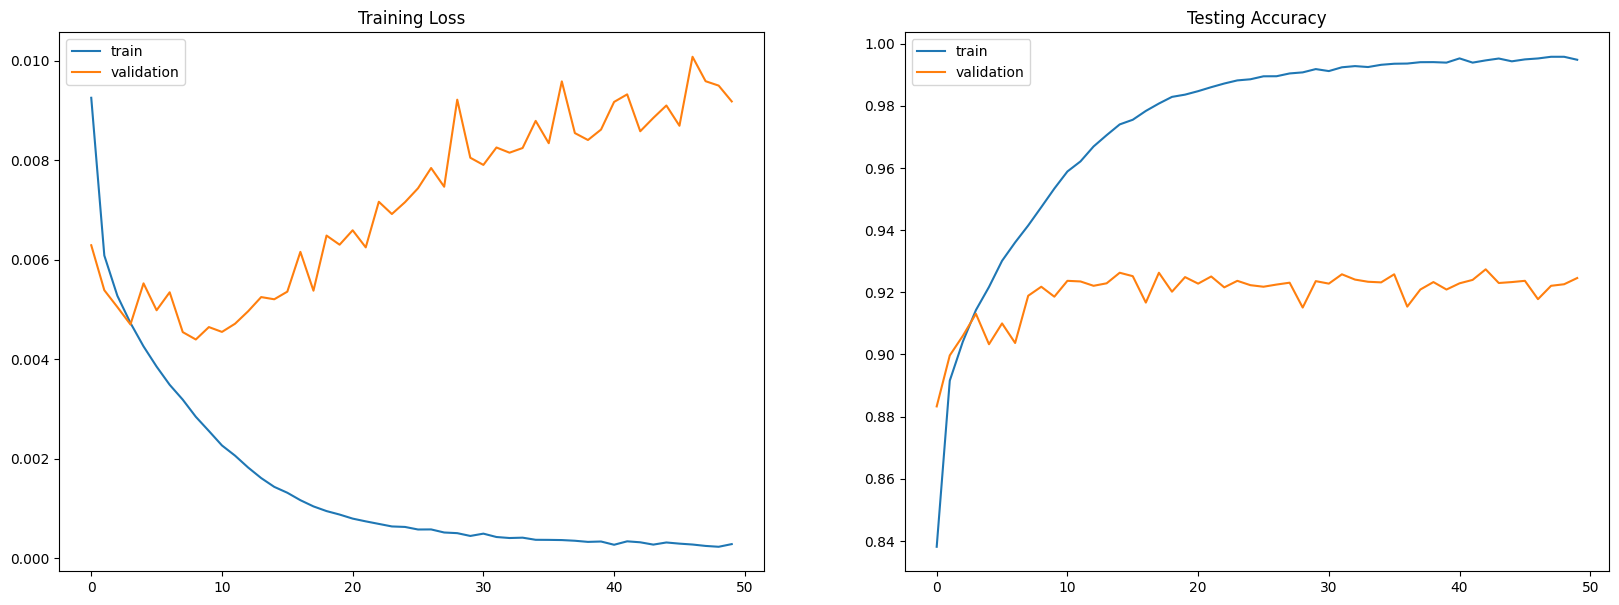

In [ ]:
epochs = [*range(0, 50, 1)]
loss_list = [train_losses, val_losses]
acc_list = [train_accs, val_accs]

fig, axs = plt.subplots(1, 2,figsize=(20, 7))
for losses in loss_list:
  axs[0].plot(epochs, losses)
axs[0].set_title('Loss')
axs[0].legend(['train', 'validation'])
for accs in acc_list:
  axs[1].plot(epochs, accs)
axs[1].set_title('Accuracy')
axs[1].legend(['train', 'validation'])


plt.show()

## Problem 2c)

Write your response in the Latex PDF report.

## Generate hw4_utils.py file

Paste your code here to test it on autograder, this should include and_gate, or_gate, threshold_activation1, predict_output_v2, preprocess_data, MLP. This will create a file called hw4_utils.py. Note that even if some Errors show up in the autograder, it does not mean your code does not work. We will still look into your implementation manually.

In [53]:
%%writefile hw4_utils.py

# Paste your code here to test it on autograder, this should include and_gate, or_gate,
# threshold_activation1, predict_output_v2, preprocess_data, MLP. This will create a file
# called hw4_utils.py. Note that even if some Errors show up in the autograder, it does
# not mean your code does not work. We will still look into your implementation manually.

import numpy as np
import torch
import torch.nn as nn
import random


def threshold_activation1(x):
  out = np.where(x<0, 0, 1)
  return out

def and_gate(x):
  n = len(x)
  out = 0
  if sum(x) > n or sum(x) == n:
    out = 1

  return out

def or_gate(x):
  out = 0
  if sum(x) > 0:
    out = 1

  return out

def predict_output_v2(X, W, b):
  ## Cache of Predictions
  predictions = []
  ## Cycle Trhough Data Points
  for idx in range(X.shape[0]):
      x = np.reshape(X[idx, :], (2, 1))
      # First layer
      first_layer_output = np.matmul(W, x) + b
      first_layer_output = threshold_activation1(first_layer_output)
      # Second layer
      first_polygon = first_layer_output[0:5, :]
      second_polygon = first_layer_output[5:10, :]
      first_gate_output = and_gate(first_polygon)
      second_gate_output = or_gate(second_polygon)
      # Output layer
      input_to_final_gate = [first_gate_output, second_gate_output]
      prediction = and_gate(input_to_final_gate)
      predictions.append(prediction)
  return predictions

def preprocess_data(X, Y, test_split=1/6, type="normalize", shuffle_seed = 3):
  """
  Base on your observation of the dataset, perform any necessary preprocessing steps given data X and label Y

  Args:
    X, Y (np.ndarry): input arrays
    test_split (float): proportion of data to use for test set (default is set to 1/6)

  Return:
    X_train, X_test, y_train, y_test (torch.Tensor): output tensor objects for training/testing.

  """

  # Note - If you plan to use additional functions, please define them as inner functions
  # under preprocess_data. This will allow us to export preprocess_data function and test
  # it thorough autograder properly. For instance:

  # ... def preprocess_data(X, Y, test_split):
  # ...
  # ...     def inner_func():
  # ...         print("Hello, World!")
  # ...
  # ...     inner_func()

  # Tips: For debugging purposes, it is a good practice to perform unit tests on your inner functions
  # before you place them under the preprocess_data function.

  # TODO:
  assert(X.shape[0] == Y.shape[0])
  assert(test_split > 0 and test_split < 1)
  train_size = X.shape[0] * (1-test_split)


  #shuffle data
  #np.random.seed(shuffle_seed)
  ind = np.random.permutation(X.shape[0])
  X_shuff = X[ind]
  Y_shuff = Y[ind]


  def typedPreprocessing(X, type):
    if type == "none":
        return X
    train_means = []
    test_means = []
    for cols in range(X.shape[1]):
      train_means.append(np.mean(X[0:int(train_size), cols]))
      test_means.append(np.mean(X[int(train_size):, cols]))
    if type == "zero_center":
      train_out = []
      test_out = []
      for cols in range(X.shape[1]):
        train_out.append([(x - train_means[cols]) for x in X[0:int(train_size), cols]])
        test_out.append([(x - test_means[cols]) for x in X[int(train_size):, cols]])
      train_out = np.transpose(train_out)
      test_out = np.transpose(test_out)
    elif type == "normalize":
      train_stds = []
      train_out = []
      test_stds = []
      test_out = []
      for cols in range(X.shape[1]):
        train_stds.append(np.std(X[:int(train_size), cols]))
        test_stds.append(np.std(X[int(train_size):, cols]))
        train_out.append([(x - train_means[cols])/train_stds[cols] for x in X[0:int(train_size), cols]])
        test_out.append([(x - test_means[cols])/test_stds[cols] for x in X[int(train_size):, cols]])
      train_out = np.transpose(train_out)
      test_out = np.transpose(test_out)
    return train_out, test_out


  def separateY(Y, test_size):
    y_train = Y[:int(train_size)]
    y_test = Y[int(train_size):]
    return y_train, y_test

  X_train, X_test = typedPreprocessing(X_shuff, "normalize")
  y_train, y_test = separateY(Y_shuff, train_size)

  return torch.from_numpy(X_train), torch.from_numpy(X_test), torch.from_numpy(y_train), torch.from_numpy(y_test)

class MLP(nn.Module):
    """
    MLP class to create a multi-layer perceptron dynamically.

    Args:
        input_dim (int): The dimensionality of the input features.
        layers_dims (list of int): A list specifying the number of units in each hidden layer.
        output_dim (int): The dimensionality of the output.
        seed_value (int, optional): Random seed for reproducibility. If this is set to None, no manual seed is set.

    Attributes:
        layers (nn.ModuleList): A ModuleList to hold all the layers including input, hidden and output layers.
    """

    def __init__(self, input_dim, layers_dims, output_dim, seed_value=None):
        """
        Initialize MLP.
        """
        super(MLP, self).__init__()

        ## TODO:

        self.layers = nn.ModuleList()
        # Adding input&hidden layer, each layer with an activation layer by sigmoid
        if len(layers_dims) == 0:
          self.layers.append(nn.Linear(input_dim, output_dim))
        else:
          # Adding input layer
          self.layers.append(nn.Linear(input_dim, layers_dims[0]))
          if len(layers_dims) != 1:
            for i in range(1, len(layers_dims)):
              assert(layers_dims[i] > 0)
              self.layers.append(nn.Linear(layers_dims[i-1], layers_dims[i]))

          # Adding output layer
          self.layers.append(nn.Linear(layers_dims[-1], output_dim))


        self._initialize_weights(seed_value)



    def _initialize_weights(self, seed_value):
        """
        Initialize the weights and biases of the model.
        """

        ## TODO:
        if seed_value != None:
          for layers in self.layers:
            if isinstance(layers, nn.Linear):
                torch.manual_seed(seed_value)
                torch.nn.init.xavier_uniform_(layers.weight)
                torch.manual_seed(seed_value)
                torch.nn.init.normal_(layers.bias)
        else:
          for layers in self.layers:
            if isinstance(layers, nn.Linear):
              torch.nn.init.xavier_uniform_(layers.weight)
              torch.nn.init.normal_(layers.bias)


    def forward(self, x):
        """
        Forward pass through the network.

        Args:
            x (torch.Tensor): input tensor.

        Returns:
            torch.Tensor: output tensor.
        """
        # TODO:
        for f in self.layers:
          x = nn.functional.sigmoid(f(x))
        return x

Overwriting hw4_utils.py
